In [1]:
import pandas as pd 
import numpy as np
from numpy import *
from datetime import datetime
from datetime import timedelta
from scipy import sparse
import scipy.stats as ss
import math
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy import sparse
from sklearn.metrics import mean_squared_error
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.offline as py
import plotly.tools as tls
import plotly.graph_objs as go
import plotly.tools as tls


C:\Users\kantr2\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
features =pd.read_csv(r'C:\Users\kantr2\Downloads\wallmart-sales-forecast-datasets\stores.csv')
features.head(20)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [3]:
def mergeData(df):
    features =pd.read_csv(r'C:\Users\kantr2\Downloads\wallmart-sales-forecast-datasets\features.csv')
    storesdata =pd.read_csv(r'C:\Users\kantr2\Downloads\wallmart-sales-forecast-datasets\stores.csv')
    df = pd.merge(df, features, on=['Store','Date','IsHoliday'],
                  how='inner')
    df = pd.merge(df, storesdata, on=['Store'],
                  how='inner')
    return df


def plot_prediction(predicted,true,desciption):
    fig, ax = plt.subplots()
    ax.scatter(true, predicted, edgecolors=(0, 0, 0))
    ax.plot([true.min(), true.max()], [true.min(), true.max()], 'k--', lw=4)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted by '+desciption)
    ax.plot([-30,30], [0,0], 'k-')   
    ax.plot([0,0], [-30,30], 'k-')
    plt.show()
def binary(movement):
    """
    Converts percent change to a binary 1 or 0, where 1 is an increase and 0 is a decrease/no change
    
    """
    direction = np.empty(movement.shape[0])
    for i in range(movement.shape[0]):
        if movement[i] > 0:
            direction[i] = 1
        else:
            direction[i]= 0
    return direction

def scatterplots(feature, label):
    x = feature
    y = df['Weekly_Sales']
    plt.scatter(x, y)
    plt.ylabel('sales')
    plt.xlabel(label)
    plt.show()

In [8]:
train = mergeData(pd.read_csv(r'C:\Users\kantr2\Downloads\wallmart-sales-forecast-datasets\train.csv'))
test = mergeData(pd.read_csv(r'C:\Users\kantr2\Downloads\wallmart-sales-forecast-datasets\test.csv'))
train['Split'] = 'Train'
test['Split'] = 'Test'
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Split
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,Train
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,Train
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,Train
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,Train
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,Train


In [10]:
t_len = len(train) # Get number of training examples
df = pd.concat([train,test],axis=0) # Join train and test
df.head() # Get an overview of the data

C:\Users\kantr2\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




,CPI,Date,Dept,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size,Split,Store,Temperature,Type,Unemployment,Weekly_Sales
0,211.096358,2010-02-05,1,2.572,False,NaN,NaN,NaN,NaN,NaN,151315,Train,1,42.31,A,8.106,24924.50
1,211.096358,2010-02-05,2,2.572,False,NaN,NaN,NaN,NaN,NaN,151315,Train,1,42.31,A,8.106,50605.27
2,211.096358,2010-02-05,3,2.572,False,NaN,NaN,NaN,NaN,NaN,151315,Train,1,42.31,A,8.106,13740.12
3,211.096358,2010-02-05,4,2.572,False,NaN,NaN,NaN,NaN,NaN,151315,Train,1,42.31,A,8.106,39954.04
4,211.096358,2010-02-05,5,2.572,False,NaN,NaN,NaN,NaN,NaN,151315,Train,1,42.31,A,8.106,32229.38


In [9]:
df.describe()

,CPI,Dept,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size,Store,Temperature,Unemployment,Weekly_Sales
count,498472.000000,536634.000000,536634.000000,265596.000000,197685.000000,242326.000000,237143.000000,266496.000000,536634.00000,536634.000000,536634.000000,498472.000000,421570.000000
mean,172.090481,44.277301,3.408310,7438.004144,3509.274827,1857.913525,3371.556866,4324.021158,136678.55096,22.208621,58.771762,7.791888,15981.258123
std,39.542149,30.527358,0.430861,9411.341379,8992.047197,11616.143274,6872.281734,13549.262124,61007.71180,12.790580,18.678716,1.865076,22711.183519
min,126.064000,1.000000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,34875.00000,1.000000,-7.290000,3.684000,-4988.940000
25%,132.521867,18.000000,3.041000,2114.640000,72.500000,7.220000,336.240000,1570.112500,93638.00000,11.000000,45.250000,6.623000,2079.650000
50%,182.442420,37.000000,3.523000,5126.540000,385.310000,40.760000,1239.040000,2870.910000,140167.00000,22.000000,60.060000,7.795000,7612.030000
75%,213.748126,74.000000,3.744000,9303.850000,2392.390000,174.260000,3397.080000,5012.220000,202505.00000,33.000000,73.230000,8.549000,20205.852500
max,228.976456,99.000000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,219622.00000,45.000000,101.950000,14.313000,693099.360000


In [11]:
df['Temperature'] = (df['Temperature'] - 32) * 5/9

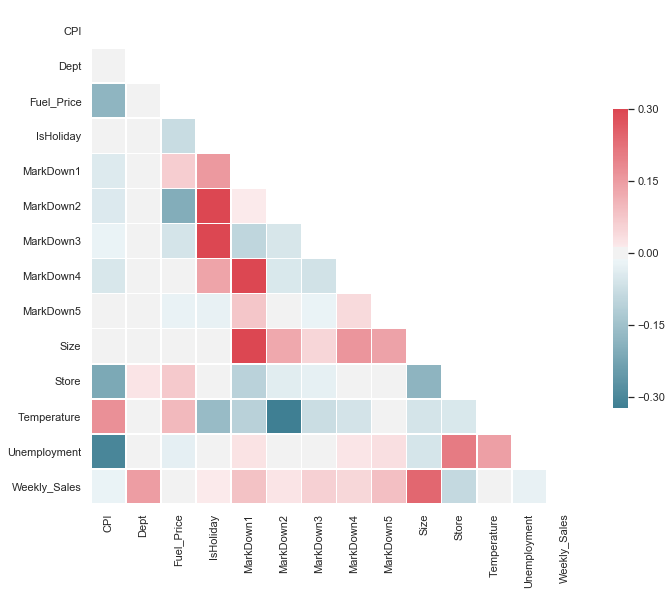

In [12]:
sns.set(style="white")
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 11))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


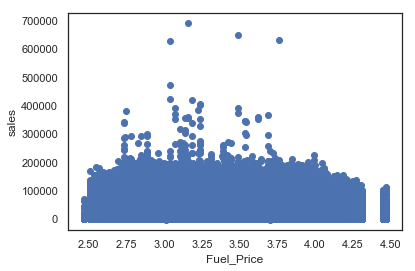

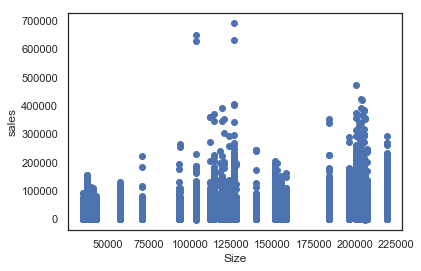

In [13]:
%matplotlib inline

headers = list(df)
labels = headers
scatterplots(df['Fuel_Price'], 'Fuel_Price')
scatterplots(df['Size'], 'Size')

In [14]:
df.loc[df['Weekly_Sales'] >300000]

,CPI,Date,Dept,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size,Split,Store,Temperature,Type,Unemployment,Weekly_Sales
32594,126.669267,2010-11-26,72,2.752,True,NaN,NaN,NaN,NaN,NaN,205863,Train,4,8.933333,A,7.127,381072.11
36312,129.836400,2011-11-25,72,3.225,True,561.45,137.88,83340.33,44.04,9239.23,205863,Train,4,8.866667,A,5.143,385051.04
36557,129.984548,2011-12-23,7,3.103,False,2461.94,69.05,2938.24,52.00,4396.76,205863,Train,4,2.177778,A,5.143,318422.01
51826,213.267296,2010-11-26,72,2.735,True,NaN,NaN,NaN,NaN,NaN,202505,Train,6,18.772222,A,7.007,342578.65
55545,220.041741,2011-11-25,72,3.236,True,429.03,171.88,83192.81,15.00,986.23,202505,Train,6,17.100000,A,6.551,326866.60
90645,126.669267,2010-11-26,72,3.162,True,NaN,NaN,NaN,NaN,NaN,126512,Train,10,12.961111,B,9.003,693099.36
90886,126.983581,2010-12-24,7,3.236,False,NaN,NaN,NaN,NaN,NaN,126512,Train,10,13.922222,B,9.003,406988.63
90936,126.983581,2010-12-24,72,3.236,False,NaN,NaN,NaN,NaN,NaN,126512,Train,10,13.922222,B,9.003,404245.03
94393,129.836400,2011-11-25,72,3.760,True,174.72,329.00,141630.61,79.00,1009.98,126512,Train,10,15.933333,B,7.874,630999.19
94634,129.984548,2011-12-23,7,3.541,False,300.02,77.73,2432.01,108.37,4078.21,126512,Train,10,9.088889,B,7.874,341308.00


In [15]:
df.loc[df['Weekly_Sales'] >240000,"Date"].value_counts()

2010-11-26    23
2011-11-25    22
2010-12-24    14
2011-12-23     9
2010-12-17     2
2011-08-26     1
2010-02-05     1
Name: Date, dtype: int64

In [16]:
df.isnull().sum()

CPI              38162
Date                 0
Dept                 0
Fuel_Price           0
IsHoliday            0
MarkDown1       271038
MarkDown2       338949
MarkDown3       294308
MarkDown4       299491
MarkDown5       270138
Size                 0
Split                0
Store                0
Temperature          0
Type                 0
Unemployment     38162
Weekly_Sales    115064
dtype: int64

In [17]:
df = df.assign(md1_present = df.MarkDown1.notnull())
df = df.assign(md2_present = df.MarkDown2.notnull())
df = df.assign(md3_present = df.MarkDown3.notnull())
df = df.assign(md4_present = df.MarkDown4.notnull())
df = df.assign(md5_present = df.MarkDown5.notnull())


In [18]:
df.fillna(0, inplace=True)

In [19]:
df.isnull().sum()


CPI             0
Date            0
Dept            0
Fuel_Price      0
IsHoliday       0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
Size            0
Split           0
Store           0
Temperature     0
Type            0
Unemployment    0
Weekly_Sales    0
md1_present     0
md2_present     0
md3_present     0
md4_present     0
md5_present     0
dtype: int64

In [20]:
df['Type'] = 'Type_' + df['Type'].map(str)
df['Store'] = 'Store_' + df['Store'].map(str)
df['Dept'] = 'Dept_' + df['Dept'].map(str)
df['IsHoliday'] = 'IsHoliday_' + df['IsHoliday'].map(str)

In [21]:
type_dummies = pd.get_dummies(df['Type'])
store_dummies = pd.get_dummies(df['Store'])
dept_dummies = pd.get_dummies(df['Dept'])
holiday_dummies = pd.get_dummies(df['IsHoliday'])

In [22]:
df['DateType'] = [datetime.strptime(date, '%Y-%m-%d').date() for date in df['Date'].astype(str).values.tolist()]
df['Month'] = [date.month for date in df['DateType']]
df['Month'] = 'Month_' + df['Month'].map(str)
Month_dummies = pd.get_dummies(df['Month'] )

In [23]:
df['Black_Friday'] = np.where((df['DateType']==datetime(2010, 11, 26).date()) | (df['DateType']==datetime(2011, 11, 25).date()), 'yes', 'no')
df['Pre_christmas'] = np.where((df['DateType']==datetime(2010, 12, 23).date()) | (df['DateType']==datetime(2010, 12, 24).date()) | (df['DateType']==datetime(2011, 12, 23).date()) | (df['DateType']==datetime(2011, 12, 24).date()), 'yes', 'no')
df['Black_Friday'] = 'Black_Friday_' + df['Black_Friday'].map(str)
df['Pre_christmas'] = 'Pre_christmas_' + df['Pre_christmas'].map(str)
Black_Friday_dummies = pd.get_dummies(df['Black_Friday'] )
Pre_christmas_dummies = pd.get_dummies(df['Pre_christmas'] )

In [24]:
df = pd.concat([df,holiday_dummies,Pre_christmas_dummies,Black_Friday_dummies],axis=1)

In [25]:
medians = pd.DataFrame({'Median Sales' :df.loc[df['Split']=='Train'].groupby(by=['Type','Dept','Store','Month','IsHoliday'])['Weekly_Sales'].median()}).reset_index()
medians.head()

,Type,Dept,Store,Month,IsHoliday,Median Sales
0,Type_A,Dept_1,Store_1,Month_1,IsHoliday_False,17350.585
1,Type_A,Dept_1,Store_1,Month_10,IsHoliday_False,23388.030
2,Type_A,Dept_1,Store_1,Month_11,IsHoliday_False,19551.115
3,Type_A,Dept_1,Store_1,Month_11,IsHoliday_True,19865.770
4,Type_A,Dept_1,Store_1,Month_12,IsHoliday_False,39109.390


In [26]:
df = df.merge(medians, how = 'outer', on = ['Type','Dept','Store','Month','IsHoliday'])


In [27]:

df['Median Sales'].fillna(df['Median Sales'].loc[df['Split']=='Train'].median(), inplace=True) 


df['Key'] = df['Type'].map(str)+df['Dept'].map(str)+df['Store'].map(str)+df['Date'].map(str)+df['IsHoliday'].map(str)

In [28]:
df.head()

,CPI,Date,Dept,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Black_Friday,Pre_christmas,IsHoliday_False,IsHoliday_True,Pre_christmas_no,Pre_christmas_yes,Black_Friday_no,Black_Friday_yes,Median Sales,Key
0,211.096358,2010-02-05,Dept_1,2.572,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0,23510.49,Type_ADept_1Store_12010-02-05IsHoliday_False
1,211.289143,2010-02-19,Dept_1,2.514,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0,23510.49,Type_ADept_1Store_12010-02-19IsHoliday_False
2,211.319643,2010-02-26,Dept_1,2.561,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0,23510.49,Type_ADept_1Store_12010-02-26IsHoliday_False
3,212.566881,2011-02-04,Dept_1,2.989,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0,23510.49,Type_ADept_1Store_12011-02-04IsHoliday_False
4,213.247885,2011-02-18,Dept_1,3.045,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0,23510.49,Type_ADept_1Store_12011-02-18IsHoliday_False


In [29]:
df['Difference'] = df['Median Sales'] - df['Weekly_Sales']

In [30]:
df.head()

,CPI,Date,Dept,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Pre_christmas,IsHoliday_False,IsHoliday_True,Pre_christmas_no,Pre_christmas_yes,Black_Friday_no,Black_Friday_yes,Median Sales,Key,Difference
0,211.096358,2010-02-05,Dept_1,2.572,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,Pre_christmas_no,1,0,1,0,1,0,23510.49,Type_ADept_1Store_12010-02-05IsHoliday_False,-1414.01
1,211.289143,2010-02-19,Dept_1,2.514,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,Pre_christmas_no,1,0,1,0,1,0,23510.49,Type_ADept_1Store_12010-02-19IsHoliday_False,-18085.06
2,211.319643,2010-02-26,Dept_1,2.561,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,Pre_christmas_no,1,0,1,0,1,0,23510.49,Type_ADept_1Store_12010-02-26IsHoliday_False,4106.95
3,212.566881,2011-02-04,Dept_1,2.989,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,Pre_christmas_no,1,0,1,0,1,0,23510.49,Type_ADept_1Store_12011-02-04IsHoliday_False,1844.73
4,213.247885,2011-02-18,Dept_1,3.045,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,Pre_christmas_no,1,0,1,0,1,0,23510.49,Type_ADept_1Store_12011-02-18IsHoliday_False,-23335.38


In [32]:


selector = [
    #'Month',
    'CPI',
    'Fuel_Price',
    'MarkDown1',
    'MarkDown2',
    'MarkDown3',
    'MarkDown4',
    'MarkDown5',
    'Size',
    'Temperature',
    'Unemployment',
    
    
    
    'md1_present',
    'md2_present',
    'md3_present',
    'md4_present',
    'md5_present',

    'IsHoliday_False',
    'IsHoliday_True',
    'Pre_christmas_no',
    'Pre_christmas_yes',
    'Black_Friday_no',
    'Black_Friday_yes',    

    ]
display(df[selector].describe())
display(df[selector].head())

,CPI,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size,Temperature,Unemployment,IsHoliday_False,IsHoliday_True,Pre_christmas_no,Pre_christmas_yes,Black_Friday_no,Black_Friday_yes
count,536634.000000,536634.000000,536634.000000,536634.000000,536634.000000,536634.000000,536634.000000,536634.00000,536634.000000,536634.000000,536634.000000,536634.000000,536634.000000,536634.000000,536634.000000,536634.000000
mean,159.852499,3.408310,3681.287709,1292.745138,838.971725,1489.918846,2147.337557,136678.55096,14.873201,7.237779,0.928091,0.071909,0.988851,0.011149,0.988896,0.011104
std,58.383773,0.430861,7593.883000,5714.136207,7860.456173,4865.593575,9789.902903,61007.71180,10.377064,2.691035,0.258338,0.258338,0.104999,0.104999,0.104791,0.104791
min,0.000000,2.472000,-2781.450000,-265.760000,-179.260000,0.000000,-185.170000,34875.00000,-21.827778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,131.126667,3.041000,0.000000,0.000000,0.000000,0.000000,0.000000,93638.00000,7.361111,6.334000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,140.439786,3.523000,0.000000,0.000000,0.000000,0.000000,0.000000,140167.00000,15.588889,7.567000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,212.303441,3.744000,5046.740000,118.730000,29.140000,906.450000,2852.190000,202505.00000,22.905556,8.512000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,228.976456,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,219622.00000,38.861111,14.313000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,CPI,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size,Temperature,Unemployment,...,md2_present,md3_present,md4_present,md5_present,IsHoliday_False,IsHoliday_True,Pre_christmas_no,Pre_christmas_yes,Black_Friday_no,Black_Friday_yes
0,211.096358,2.572,0.0,0.0,0.0,0.0,0.0,151315,5.727778,8.106,...,False,False,False,False,1,0,1,0,1,0
1,211.289143,2.514,0.0,0.0,0.0,0.0,0.0,151315,4.405556,8.106,...,False,False,False,False,1,0,1,0,1,0
2,211.319643,2.561,0.0,0.0,0.0,0.0,0.0,151315,8.127778,8.106,...,False,False,False,False,1,0,1,0,1,0
3,212.566881,2.989,0.0,0.0,0.0,0.0,0.0,151315,5.705556,7.742,...,False,False,False,False,1,0,1,0,1,0
4,213.247885,3.045,0.0,0.0,0.0,0.0,0.0,151315,14.088889,7.742,...,False,False,False,False,1,0,1,0,1,0


In [33]:
train = df.loc[df['Split']=='Train']
test = df.loc[df['Split']=='Test']
test.head()

,CPI,Date,Dept,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Pre_christmas,IsHoliday_False,IsHoliday_True,Pre_christmas_no,Pre_christmas_yes,Black_Friday_no,Black_Friday_yes,Median Sales,Key,Difference
9,224.235290,2013-02-01,Dept_1,3.244,IsHoliday_False,9290.91,1359.90,265.00,20657.82,972.61,...,Pre_christmas_no,1,0,1,0,1,0,23510.49,Type_ADept_1Store_12013-02-01IsHoliday_False,23510.49
10,224.276053,2013-02-15,Dept_1,3.475,IsHoliday_False,72937.29,6665.52,47.21,13014.67,6310.18,...,Pre_christmas_no,1,0,1,0,1,0,23510.49,Type_ADept_1Store_12013-02-15IsHoliday_False,23510.49
11,224.420289,2013-02-22,Dept_1,3.597,IsHoliday_False,20107.75,3163.89,42.20,15657.30,5812.86,...,Pre_christmas_no,1,0,1,0,1,0,23510.49,Type_ADept_1Store_12013-02-22IsHoliday_False,23510.49
21,224.235290,2013-02-01,Dept_2,3.244,IsHoliday_False,9290.91,1359.90,265.00,20657.82,972.61,...,Pre_christmas_no,1,0,1,0,1,0,47080.12,Type_ADept_2Store_12013-02-01IsHoliday_False,47080.12
22,224.276053,2013-02-15,Dept_2,3.475,IsHoliday_False,72937.29,6665.52,47.21,13014.67,6310.18,...,Pre_christmas_no,1,0,1,0,1,0,47080.12,Type_ADept_2Store_12013-02-15IsHoliday_False,47080.12


In [34]:
np.random.seed(42)
X_train, X_dev, y_train, y_dev = train_test_split(train[selector], train['Difference'], test_size=0.2, random_state=42)
print(X_dev.shape)
print(y_dev.shape)

(84314, 21)
(84314,)


In [35]:
regr = RandomForestRegressor(n_estimators=20, criterion='mse', max_depth=None, 
                      min_samples_split=2, min_samples_leaf=1, 
                      min_weight_fraction_leaf=0.0, max_features='auto', 
                      max_leaf_nodes=None, min_impurity_decrease=0.0, 
                      min_impurity_split=None, bootstrap=True, 
                      oob_score=False, n_jobs=1, random_state=None, 
                      verbose=2, warm_start=False)

#Train on data
regr.fit(X_train, y_train.ravel())

building tree 1 of 20


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   37.5s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=None, verbose=2, warm_start=False)

In [36]:
y_pred_random = regr.predict(X_dev)

y_dev = y_dev.to_frame()

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.5s finished


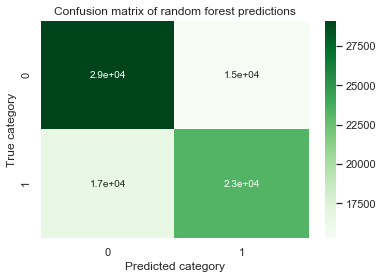

In [37]:

direction_true1= binary(y_dev.values)
direction_predict = binary(y_pred_random)

## show confusion matrix random forest
cnf_matrix = confusion_matrix(direction_true1, direction_predict)

fig, ax = plt.subplots(1)
ax = sns.heatmap(cnf_matrix, ax=ax, cmap=plt.cm.Greens, annot=True)
#ax.set_xticklabels(abbreviation)
#ax.set_yticklabels(abbreviation)
plt.title('Confusion matrix of random forest predictions')
plt.ylabel('True category')
plt.xlabel('Predicted category')
plt.show();